In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df_sub = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv') 
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.isnull().sum().head(100)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

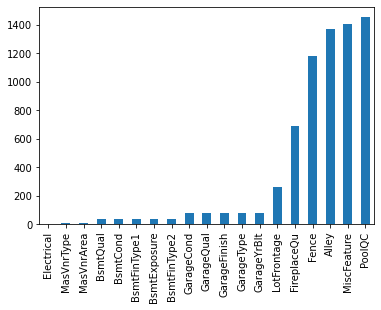

In [7]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [8]:
df_train.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


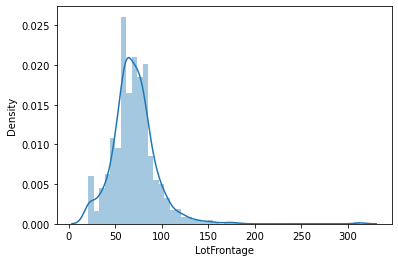

In [9]:
ax = sns.distplot(df_train['LotFrontage'])

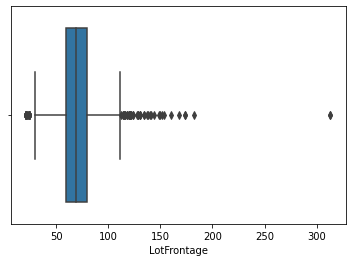

In [10]:
ax = sns.boxplot(x=df_train['LotFrontage'])

In [11]:
df_train['LotFrontage'].fillna(df_train.LotFrontage.median(), inplace = True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


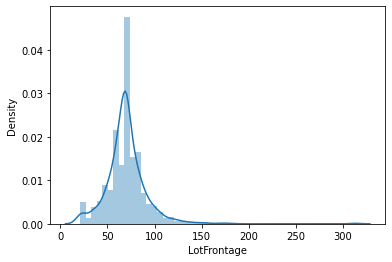

In [12]:
ax = sns.distplot(df_train['LotFrontage'])

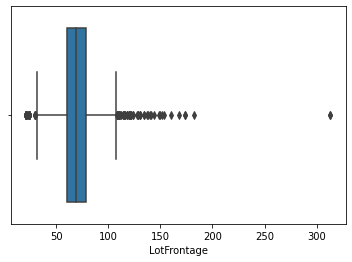

In [13]:
ax = sns.boxplot(x=df_train['LotFrontage'])

In [14]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

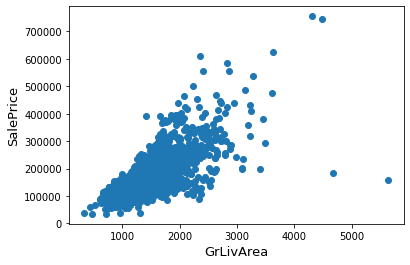

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


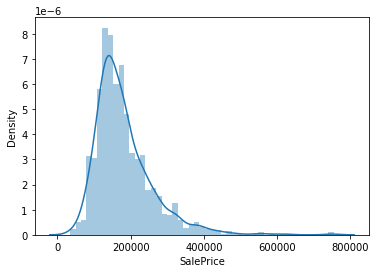

In [16]:
ax = sns.distplot(df_train['SalePrice'])

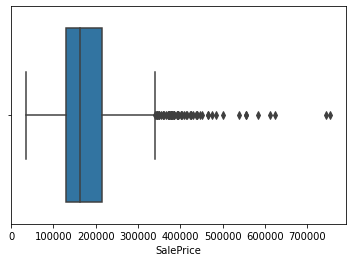

In [17]:
ax = sns.boxplot(x=df_train['SalePrice'])

In [18]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

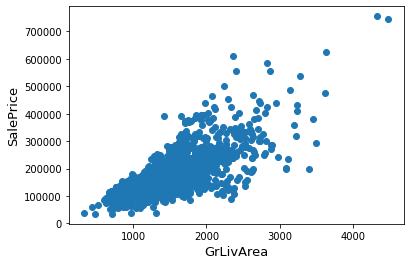

In [19]:
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

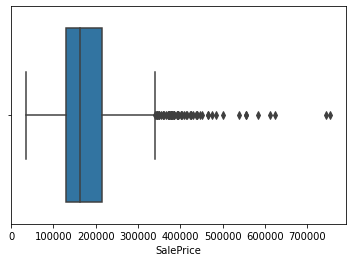

In [20]:
ax = sns.boxplot(x=df_train['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


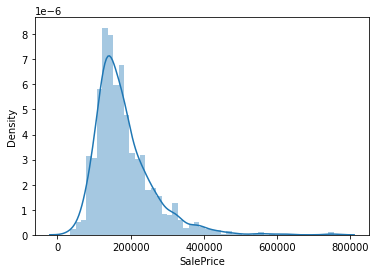

In [21]:
ax = sns.distplot(df_train['SalePrice'])

In [22]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


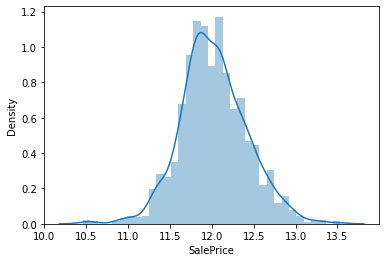

In [23]:
ax = sns.distplot(df_train['SalePrice'])

In [24]:
ntrain = df_train.shape
display (ntrain)

(1458, 81)

In [25]:
df_train_nu = (df_train.isnull().sum() / len(df_train)) * 100
df_train_nu = df_train_nu.drop(df_train_nu[df_train_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_train_nu})
missing_data.head(100)

,Missing Ratio
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
GarageType,5.555556
GarageYrBlt,5.555556
GarageFinish,5.555556
GarageQual,5.555556
GarageCond,5.555556


Text(0.5, 1.0, 'Percent missing data by feature')

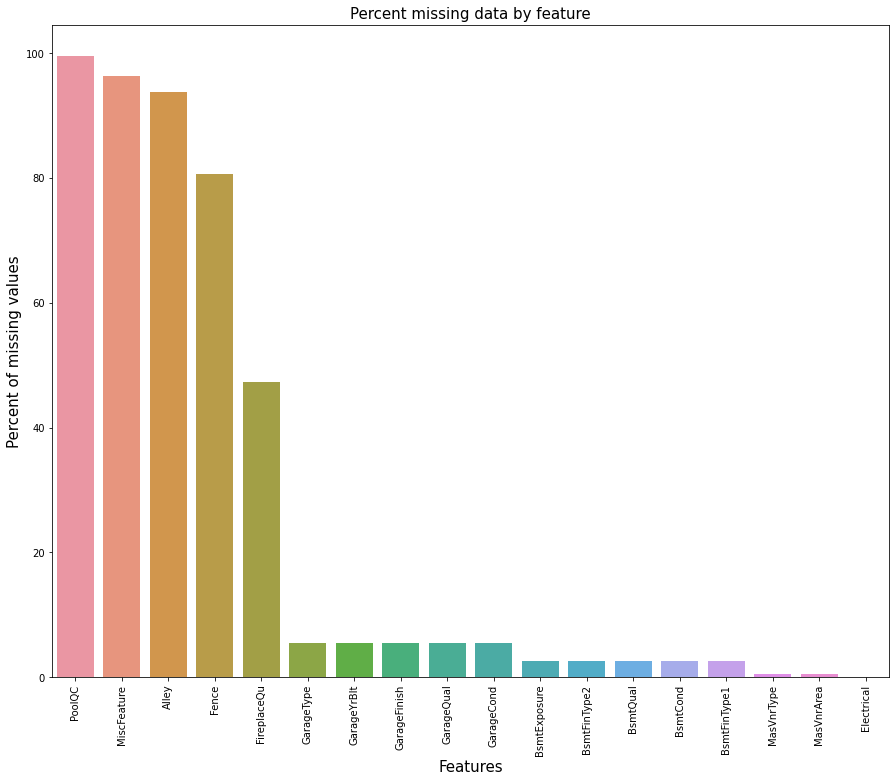

In [26]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_train_nu.index, y=df_train_nu)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

In [28]:
df_train.PoolQC.isnull().sum()

1452

In [29]:
df_train['MiscFeature'].isnull().sum()

1404

In [30]:
df_train['Alley'].isnull().sum()

1367

In [31]:
df_train['Fence'].isnull().sum()

1177

In [32]:
df_train['FireplaceQu'].isnull().sum()

690

In [33]:
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1, inplace = True )
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,11.864469


In [34]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [35]:
df_train_nu = (df_train.isnull().sum() / len(df_train)) * 100
df_train_nu = df_train_nu.drop(df_train_nu[df_train_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_train_nu})
missing_data.head(100)

,Missing Ratio
GarageType,5.555556
GarageYrBlt,5.555556
GarageFinish,5.555556
GarageQual,5.555556
GarageCond,5.555556
BsmtExposure,2.606310
BsmtFinType2,2.606310
BsmtQual,2.537723
BsmtCond,2.537723
BsmtFinType1,2.537723


In [36]:
df_train.GarageType

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1458, dtype: object

In [37]:
df_train['GarageType'].isnull().sum()

81

In [38]:
df_train['GarageType'].fillna(df_train['GarageType'].mode()[0], inplace = True)

In [39]:
df_train['GarageType'].mode()[0]

'Attchd'

In [40]:
df_train['GarageType'].isnull().sum()

0

In [41]:
df_train.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1458, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


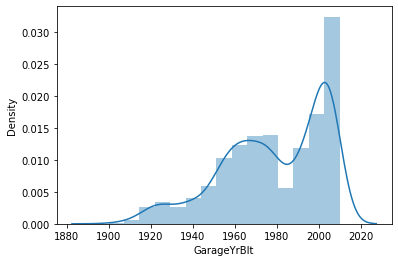

In [42]:
ax = sns.distplot(df_train['GarageYrBlt'])

In [43]:
df_train['GarageYrBlt'].isnull().sum()

81

In [44]:
df_train.GarageYrBlt.median()

1980.0

In [45]:
df_train['GarageYrBlt'].fillna(df_train.GarageYrBlt.median(), inplace = True)

In [46]:
df_train['GarageYrBlt'].isnull().sum()

0

In [47]:
df_train_nu = (df_train.isnull().sum() / len(df_train)) * 100
df_train_nu = df_train_nu.drop(df_train_nu[df_train_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_train_nu})
missing_data.head(100)

,Missing Ratio
GarageFinish,5.555556
GarageQual,5.555556
GarageCond,5.555556
BsmtExposure,2.606310
BsmtFinType2,2.606310
BsmtQual,2.537723
BsmtCond,2.537723
BsmtFinType1,2.537723
MasVnrType,0.548697
MasVnrArea,0.548697


In [48]:
df_train['GarageFinish'].isnull().sum()

81

In [49]:
df_train.GarageFinish

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1458, dtype: object

In [50]:
df_train['GarageFinish'].fillna(df_train.GarageFinish.mode()[0], inplace = True)

In [51]:
df_train['GarageFinish'].isnull().sum()

0

In [52]:
df_train['GarageQual'].isnull().sum()

81

In [53]:
df_train.GarageQual

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1458, dtype: object

In [54]:
df_train['GarageQual'].fillna(df_train.GarageQual.mode()[0], inplace = True)

In [55]:
df_train['GarageQual'].isnull().sum()

0

In [56]:
df_train['GarageCond'].isnull().sum()

81

In [57]:
df_train.GarageCond

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1458, dtype: object

In [58]:
df_train['GarageCond'].fillna(df_train.GarageCond.mode()[0], inplace = True)

In [59]:
df_train['GarageCond'].isnull().sum()

0

In [60]:
df_train.BsmtExposure

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1458, dtype: object

In [61]:
df_train['BsmtExposure'].isnull().sum()

38

In [62]:
df_train['BsmtExposure'].fillna(df_train.BsmtExposure.mode()[0], inplace = True)

In [63]:
df_train['BsmtExposure'].isnull().sum()

0

In [64]:
df_train.BsmtFinType2

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1458, dtype: object

In [65]:
df_train['BsmtFinType2'].isnull().sum()

38

In [66]:
df_train['BsmtFinType2'].fillna(df_train.BsmtFinType2.mode()[0], inplace = True)

In [67]:
df_train['BsmtFinType2'].isnull().sum()

0

In [68]:
df_train.BsmtQual

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1458, dtype: object

In [69]:
df_train['BsmtQual'].isnull().sum()

37

In [70]:
df_train['BsmtQual'].fillna(df_train.BsmtQual.mode()[0], inplace = True)

In [71]:
df_train['BsmtQual'].isnull().sum()

0

In [72]:
df_train.BsmtCond

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1458, dtype: object

In [73]:
df_train['BsmtCond'].isnull().sum()

37

In [74]:
df_train['BsmtCond'].fillna(df_train.BsmtCond.mode()[0], inplace = True)

In [75]:
df_train['BsmtCond'].isnull().sum()

0

In [76]:
df_train.BsmtFinType1

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1458, dtype: object

In [77]:
df_train['BsmtFinType1'].isnull().sum()

37

In [78]:
df_train['BsmtFinType1'].fillna(df_train.BsmtFinType1.mode()[0], inplace = True)

In [79]:
df_train['BsmtFinType1'].isnull().sum()

0

In [80]:
df_train.MasVnrType

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1458, dtype: object

In [81]:
df_train.MasVnrArea

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1458, dtype: float64

In [82]:
df_train['MasVnrArea'].isnull().sum()

8

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


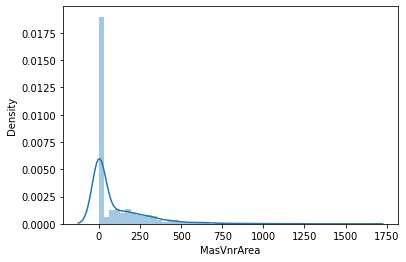

In [83]:
ax = sns.distplot(df_train['MasVnrArea'])

In [84]:
df_train['MasVnrArea'].fillna(df_train.MasVnrArea.median(), inplace = True)

In [85]:
df_train['MasVnrArea'].isnull().sum()

0

In [86]:
df_train.MasVnrType

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1458, dtype: object

In [87]:
df_train.Electrical

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1458, dtype: object

In [88]:
df_train.dropna(inplace=True)

In [89]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [90]:
df_train_nu = (df_train.isnull().sum() / len(df_train)) * 100
df_train_nu = df_train_nu.drop(df_train_nu[df_train_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_train_nu})
missing_data.head(100)

,Missing Ratio


<AxesSubplot:>

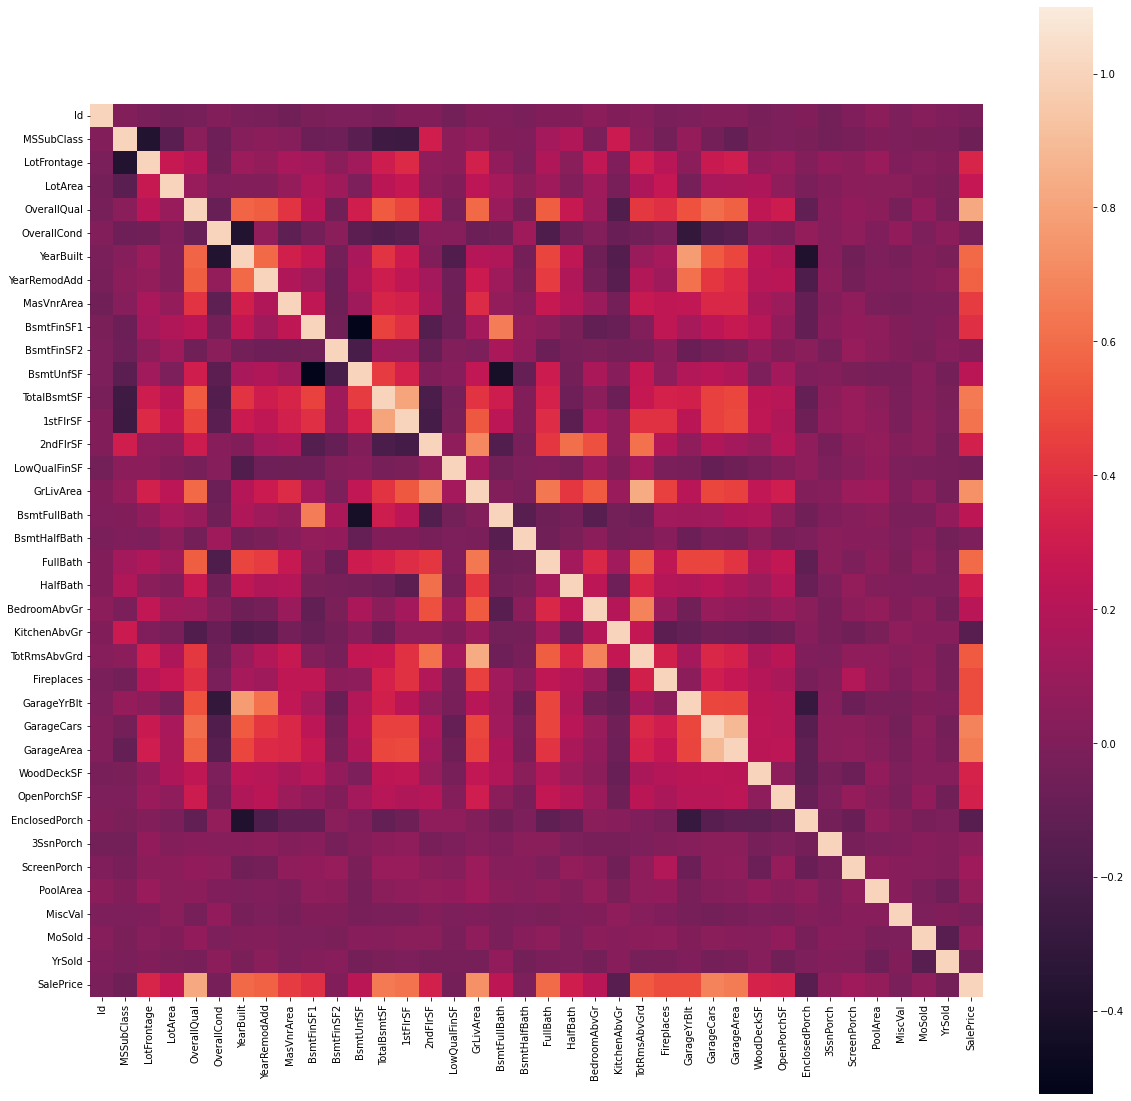

In [91]:
corrmat = df_train.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, vmax=1.1, square=True)

In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1449 non-null   int64  
 1   MSSubClass     1449 non-null   int64  
 2   MSZoning       1449 non-null   object 
 3   LotFrontage    1449 non-null   float64
 4   LotArea        1449 non-null   int64  
 5   Street         1449 non-null   object 
 6   LotShape       1449 non-null   object 
 7   LandContour    1449 non-null   object 
 8   Utilities      1449 non-null   object 
 9   LotConfig      1449 non-null   object 
 10  LandSlope      1449 non-null   object 
 11  Neighborhood   1449 non-null   object 
 12  Condition1     1449 non-null   object 
 13  Condition2     1449 non-null   object 
 14  BldgType       1449 non-null   object 
 15  HouseStyle     1449 non-null   object 
 16  OverallQual    1449 non-null   int64  
 17  OverallCond    1449 non-null   int64  
 18  YearBuil

In [93]:
df_train.select_dtypes(include=['object'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [94]:
df_train_object=df_train.select_dtypes(include=['object'])

In [95]:
df_train_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
object_cols = ('MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition')

In [98]:
for i in object_cols:
    lb_encoder = LabelEncoder() 
    lb_encoder.fit(list(df_train[i].values)) 
    df_train[i] = lb_encoder.transform(list(df_train[i].values))

In [99]:
df_train.select_dtypes(include=['object'])

""
0
1
2
3
4
...
1455
1456
1457
1458


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1449 non-null   int64  
 1   MSSubClass     1449 non-null   int64  
 2   MSZoning       1449 non-null   int64  
 3   LotFrontage    1449 non-null   float64
 4   LotArea        1449 non-null   int64  
 5   Street         1449 non-null   int64  
 6   LotShape       1449 non-null   int64  
 7   LandContour    1449 non-null   int64  
 8   Utilities      1449 non-null   int64  
 9   LotConfig      1449 non-null   int64  
 10  LandSlope      1449 non-null   int64  
 11  Neighborhood   1449 non-null   int64  
 12  Condition1     1449 non-null   int64  
 13  Condition2     1449 non-null   int64  
 14  BldgType       1449 non-null   int64  
 15  HouseStyle     1449 non-null   int64  
 16  OverallQual    1449 non-null   int64  
 17  OverallCond    1449 non-null   int64  
 18  YearBuil

**Dealing with Test Set**


In [101]:
df_test['BsmtFullBath']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1454    0.0
1455    0.0
1456    1.0
1457    0.0
1458    0.0
Name: BsmtFullBath, Length: 1459, dtype: float64

In [102]:
df_test['BsmtHalfBath']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1454    0.0
1455    0.0
1456    0.0
1457    1.0
1458    0.0
Name: BsmtHalfBath, Length: 1459, dtype: float64

0        468.0
1        923.0
2        791.0
3        602.0
4        263.0
         ...  
1454       0.0
1455     252.0
1456    1224.0
1457     337.0
1458     758.0
Name: BsmtFinSF1, Length: 1459, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


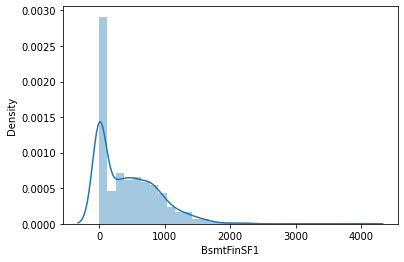

In [103]:
display (df_test['BsmtFinSF1'])
ax = sns.distplot(df_test['BsmtFinSF1'])

In [104]:
df_test['GarageCars']

0       1.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1454    0.0
1455    1.0
1456    2.0
1457    0.0
1458    3.0
Name: GarageCars, Length: 1459, dtype: float64

0       730.0
1       312.0
2       482.0
3       470.0
4       506.0
        ...  
1454      0.0
1455    286.0
1456    576.0
1457      0.0
1458    650.0
Name: GarageArea, Length: 1459, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


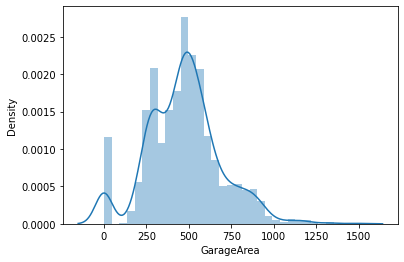

In [105]:
display (df_test['GarageArea'])
ax = sns.distplot(df_test['GarageArea'])

0        882.0
1       1329.0
2        928.0
3        926.0
4       1280.0
         ...  
1454     546.0
1455     546.0
1456    1224.0
1457     912.0
1458     996.0
Name: TotalBsmtSF, Length: 1459, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


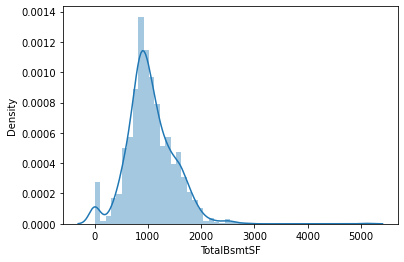

In [106]:
display (df_test['TotalBsmtSF'])
ax = sns.distplot(df_test['TotalBsmtSF'])

In [107]:
df_test['BsmtFinSF2']

0       144.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458      0.0
Name: BsmtFinSF2, Length: 1459, dtype: float64

In [108]:
df_test['BsmtUnfSF']

0        270.0
1        406.0
2        137.0
3        324.0
4       1017.0
         ...  
1454     546.0
1455     294.0
1456       0.0
1457     575.0
1458     238.0
Name: BsmtUnfSF, Length: 1459, dtype: float64

In [109]:
df_test_nu = (df_test.isnull().sum() / len(df_test)) * 100
df_test_nu = df_test_nu.drop(df_train_nu[df_test_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_test_nu})
missing_data.head(100)

,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageQual,5.346127
GarageFinish,5.346127
GarageCond,5.346127


In [110]:
df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1, inplace = True )

In [111]:
df_test['LotFrontage'].fillna(df_test.LotFrontage.median(), inplace = True)
df_test['GarageType'].fillna(df_test['GarageType'].mode()[0], inplace = True)
df_test['GarageYrBlt'].fillna(df_test.GarageYrBlt.median(), inplace = True)
df_test['GarageFinish'].fillna(df_test.GarageFinish.mode()[0], inplace = True)
df_test['GarageQual'].fillna(df_test.GarageQual.mode()[0], inplace = True)
df_test['GarageCond'].fillna(df_test.GarageCond.mode()[0], inplace = True)
df_test['BsmtExposure'].fillna(df_test.BsmtExposure.mode()[0], inplace = True)
df_test['BsmtFinType2'].fillna(df_test.BsmtFinType2.mode()[0], inplace = True)
df_test['BsmtQual'].fillna(df_test.BsmtQual.mode()[0], inplace = True)
df_test['BsmtCond'].fillna(df_test.BsmtCond.mode()[0], inplace = True)
df_test['BsmtFinType1'].fillna(df_test.BsmtFinType1.mode()[0], inplace = True)
df_test['MasVnrArea'].fillna(df_test.MasVnrArea.median(), inplace = True)
df_test['Electrical'].fillna(df_test.Electrical.mode()[0], inplace = True)
df_test['MasVnrType'].fillna(df_test.MasVnrType.mode()[0], inplace = True)

df_test['BsmtFullBath'].fillna(df_test.BsmtFullBath.mode()[0], inplace = True)
df_test['BsmtHalfBath'].fillna(df_test.BsmtHalfBath.mode()[0], inplace = True)
df_test['BsmtFinSF1'].fillna(df_test.BsmtFinSF1.median(), inplace = True)
df_test['GarageCars'].fillna(df_test.GarageCars.mode()[0], inplace = True)
df_test['GarageArea'].fillna(df_test.GarageArea.mean(), inplace = True)
df_test['TotalBsmtSF'].fillna(df_test.TotalBsmtSF.mode()[0], inplace = True)
df_test['BsmtFinSF2'].fillna(df_test.BsmtFinSF2.mode()[0], inplace = True)
df_test['BsmtUnfSF'].fillna(df_test.BsmtUnfSF.median(), inplace = True)
df_test['MSZoning'].fillna(df_test.MSZoning.mode()[0], inplace = True)
df_test['Functional'].fillna(df_test.Functional.mode()[0], inplace = True)
df_test['Utilities'].fillna(df_test.Utilities.mode()[0], inplace = True)
df_test['Exterior2nd'].fillna(df_test.Exterior2nd.mode()[0], inplace = True)
df_test['Exterior1st'].fillna(df_test.Exterior1st.mode()[0], inplace = True)
df_test['SaleType'].fillna(df_test.SaleType.mode()[0], inplace = True)
df_test['KitchenQual'].fillna(df_test.KitchenQual.mode()[0], inplace = True)


In [112]:
df_test_nu = (df_test.isnull().sum() / len(df_test)) * 100
df_test_nu = df_test_nu.drop(df_train_nu[df_test_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_test_nu})
missing_data.head(100)

,Missing Ratio
Id,0.0
GarageType,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0
BedroomAbvGr,0.0
HalfBath,0.0
FullBath,0.0
BsmtHalfBath,0.0


In [113]:
df_test.select_dtypes(include=['object'])
df_test_object=df_test.select_dtypes(include=['object'])
df_test_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [114]:
for i in object_cols:
    lb_encoder = LabelEncoder() 
    lb_encoder.fit(list(df_test[i].values)) 
    df_test[i] = lb_encoder.transform(list(df_test[i].values))

In [115]:
df_test.select_dtypes(include=['object'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [116]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [117]:
x_data=df_train.drop('SalePrice',axis=1)
y_data=df_train['SalePrice']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 1164 to 378
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1159 non-null   int64  
 1   MSSubClass     1159 non-null   int64  
 2   MSZoning       1159 non-null   int64  
 3   LotFrontage    1159 non-null   float64
 4   LotArea        1159 non-null   int64  
 5   Street         1159 non-null   int64  
 6   LotShape       1159 non-null   int64  
 7   LandContour    1159 non-null   int64  
 8   Utilities      1159 non-null   int64  
 9   LotConfig      1159 non-null   int64  
 10  LandSlope      1159 non-null   int64  
 11  Neighborhood   1159 non-null   int64  
 12  Condition1     1159 non-null   int64  
 13  Condition2     1159 non-null   int64  
 14  BldgType       1159 non-null   int64  
 15  HouseStyle     1159 non-null   int64  
 16  OverallQual    1159 non-null   int64  
 17  OverallCond    1159 non-null   int64  
 18  YearBu

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
model = LinearRegression()

In [121]:
model.fit(x_train , y_train)
predictions = model.predict(x_test)

In [122]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

In [123]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predictions))

Mean Absolute Error(MAE): 0.08710870393765907


In [124]:
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predictions))

Mean Squared Error(MSE): 0.013733778618474714


In [125]:
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error (RMSE): 0.11719120538024479


In [126]:
print('Explained Variance Score (EVS):',explained_variance_score(y_test,predictions))

Explained Variance Score (EVS): 0.904755445038005


In [127]:
print('R2:',metrics.r2_score(y_test, predictions))

R2: 0.9047476006497244


In [128]:
print('R2 rounded:',(metrics.r2_score(y_test, predictions)).round(2))
r2 = r2_score(y_test, predictions)
r2_rounded = r2_score(y_test, predictions).round(2)

R2 rounded: 0.9


In [129]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [130]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model.fit(x_train , y_train)
ridge_predictions = model.predict(x_test)

In [131]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, ridge_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, ridge_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ridge_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,ridge_predictions))
print('R2:',metrics.r2_score(y_test, ridge_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, ridge_predictions)).round(2))
r2 = r2_score(y_test, ridge_predictions)
r2_rounded = r2_score(y_test, ridge_predictions).round(2)

Mean Absolute Error(MAE): 0.08710870393765907
Mean Squared Error(MSE): 0.013733778618474714
Root Mean Squared Error (RMSE): 0.11719120538024479
Explained Variance Score (EVS): 0.904755445038005
R2: 0.9047476006497244
R2 rounded: 0.9


In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
model_DecisionTree = DecisionTreeRegressor()
model.fit(x_train , y_train)
DecisionTree_predictions = model.predict(x_test)

In [134]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, DecisionTree_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, DecisionTree_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, DecisionTree_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,DecisionTree_predictions))
print('R2:',metrics.r2_score(y_test, DecisionTree_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, DecisionTree_predictions)).round(2))
r2 = r2_score(y_test, DecisionTree_predictions)
r2_rounded = r2_score(y_test, DecisionTree_predictions).round(2)

Mean Absolute Error(MAE): 0.08710870393765907
Mean Squared Error(MSE): 0.013733778618474714
Root Mean Squared Error (RMSE): 0.11719120538024479
Explained Variance Score (EVS): 0.904755445038005
R2: 0.9047476006497244
R2 rounded: 0.9


In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
model_RandomForest = RandomForestRegressor()
model.fit(x_train , y_train)
RandomForest_predictions = model.predict(x_test)

In [137]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, RandomForest_predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, RandomForest_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, RandomForest_predictions)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,RandomForest_predictions))
print('R2:',metrics.r2_score(y_test, RandomForest_predictions))
print('R2 rounded:',(metrics.r2_score(y_test, RandomForest_predictions)).round(2))
r2 = r2_score(y_test, RandomForest_predictions)
r2_rounded = r2_score(y_test, RandomForest_predictions).round(2)

Mean Absolute Error(MAE): 0.08710870393765907
Mean Squared Error(MSE): 0.013733778618474714
Root Mean Squared Error (RMSE): 0.11719120538024479
Explained Variance Score (EVS): 0.904755445038005
R2: 0.9047476006497244
R2 rounded: 0.9


In [138]:
RandomForest_predictions

array([12.19865655, 12.21836881, 12.2262514 , 12.39061049, 11.78225693,
       11.71841948, 11.67919472, 11.83408959, 11.75659412, 11.82949187,
       11.81579033, 11.589882  , 11.6285514 , 11.66847933, 12.11108054,
       11.94760826, 11.40105033, 12.13714922, 11.34369285, 13.1001601 ,
       11.84836861, 12.18883833, 11.87661555, 12.37933381, 11.89453203,
       12.57674397, 12.00385139, 11.7572944 , 11.69450187, 11.94593098,
       12.85317061, 12.82447016, 12.56036367, 12.26815219, 12.00838139,
       11.81175096, 11.89415369, 11.62604353, 12.91333195, 12.45549194,
       11.73945471, 11.68853097, 11.78905669, 11.96677035, 12.38173887,
       12.18975175, 12.21899143, 13.00847132, 12.59731393, 12.40544977,
       11.25281042, 12.24768836, 11.72703573, 12.42597223, 12.05113766,
       12.59980093, 11.8753197 , 11.63481295, 12.46361248, 12.42760034,
       12.14127512, 12.11146807, 11.74888869, 11.59096666, 11.53620831,
       11.8515105 , 11.68520113, 11.517361  , 12.13625912, 12.65

In [139]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,5,4,8,4
1,1462,0,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,5,4,8,4
2,1463,5,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,2,4,8,4
3,1464,5,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,5,4,8,4
4,1465,11,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,0,4,8,4


In [140]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [141]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 827 to 214
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             290 non-null    int64  
 1   MSSubClass     290 non-null    int64  
 2   MSZoning       290 non-null    int64  
 3   LotFrontage    290 non-null    float64
 4   LotArea        290 non-null    int64  
 5   Street         290 non-null    int64  
 6   LotShape       290 non-null    int64  
 7   LandContour    290 non-null    int64  
 8   Utilities      290 non-null    int64  
 9   LotConfig      290 non-null    int64  
 10  LandSlope      290 non-null    int64  
 11  Neighborhood   290 non-null    int64  
 12  Condition1     290 non-null    int64  
 13  Condition2     290 non-null    int64  
 14  BldgType       290 non-null    int64  
 15  HouseStyle     290 non-null    int64  
 16  OverallQual    290 non-null    int64  
 17  OverallCond    290 non-null    int64  
 18  YearBuil

In [142]:
df_test_nu = (df_test.isnull().sum() / len(df_test)) * 100
df_test_nu = df_test_nu.drop(df_train_nu[df_test_nu == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_test_nu})
missing_data.head(100)

,Missing Ratio
Id,0.0
GarageType,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0
BedroomAbvGr,0.0
HalfBath,0.0
FullBath,0.0
BsmtHalfBath,0.0


In [143]:
test_RandomForest_predictions = model.predict(df_test)

In [144]:
test_RandomForest_predictions

array([11.71500643, 11.98548737, 12.10129369, ..., 12.08584585,
       11.74026449, 12.3752145 ])

In [145]:
submission = df_test[['Id']]

In [146]:
submission

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [147]:
submission['SalePrice'] = test_RandomForest_predictions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
submission

,Id,SalePrice
0,1461,11.715006
1,1462,11.985487
2,1463,12.101294
3,1464,12.208187
4,1465,12.155724
...,...,...
1454,2915,11.536287
1455,2916,11.391184
1456,2917,12.085846
1457,2918,11.740264


In [149]:
submission.to_csv('submission.csv', index = None)

In [150]:
subb = pd.read_csv('submission.csv')
subb.head()

,Id,SalePrice
0,1461,11.715006
1,1462,11.985487
2,1463,12.101294
3,1464,12.208187
4,1465,12.155724
